In [1]:
import pandas as pd
import numpy as np
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import matplotlib.dates as mdates
import datetime as dt
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.tsa.arima_model import ARIMA


Base de datos de la temperatura de la Tierra por Paises y Global. Base de datos obtenida de Kaggle (https://www.kaggle.com/sachinsarkar/climate-change-global-temperature-data)

In [2]:
# Leemos la tabla con la que vamos a trabajar y renombramos las columnas

file_path="tablas_ini/Kaggledata_GlobalLandTemperaturesByCountry.csv"
data_GobalTemp_Country=pd.read_csv(file_path,converters={"dt":pd.to_datetime})
data_GobalTemp_Country.rename(columns={"dt": "fecha","AverageTemperature": "Temp. promedio", 
                     "AverageTemperatureUncertainty":"Error","Country":"Pais"},inplace=True)

data_GobalTemp_Country=data_GobalTemp_Country.set_index("fecha")

In [3]:
# Listamos todos los paises de los que hay medidas de temperatura
lista_paises =pd.unique(data_GobalTemp_Country["Pais"]).tolist()
print(lista_paises)

['Åland', 'Afghanistan', 'Africa', 'Albania', 'Algeria', 'American Samoa', 'Andorra', 'Angola', 'Anguilla', 'Antarctica', 'Antigua And Barbuda', 'Argentina', 'Armenia', 'Aruba', 'Asia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Baker Island', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia', 'Bonaire, Saint Eustatius And Saba', 'Bosnia And Herzegovina', 'Botswana', 'Brazil', 'British Virgin Islands', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi', "Côte D'Ivoire", 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde', 'Cayman Islands', 'Central African Republic', 'Chad', 'Chile', 'China', 'Christmas Island', 'Colombia', 'Comoros', 'Congo (Democratic Republic Of The)', 'Congo', 'Costa Rica', 'Croatia', 'Cuba', 'Curaçao', 'Cyprus', 'Czech Republic', 'Denmark (Europe)', 'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Ethiopia', 'Europe', 'Falkland Islan

In [4]:
# Función para selecionar los datos del Pais que nos interesa y renombrar las columnas con el nombre del pais
def crear_lista(df,pais):
    df=df.loc[((df['Pais'] == pais))]
    df.drop("Pais",axis=1,inplace=True)
    df.rename(columns={"Temp. promedio": "Temp. "+str(pais),"Error": "Error "+str(pais)},inplace=True)
    return df

In [5]:
# Selecionamos los datos de los continentes y los juntamos todos en un único DataFrame
data_Asia=crear_lista(data_GobalTemp_Country,"Asia")
data_Europe=crear_lista(data_GobalTemp_Country,"Europe")
data_Africa=crear_lista(data_GobalTemp_Country,"Africa")
data_North_America=crear_lista(data_GobalTemp_Country,"North America")
data_Oceania=crear_lista(data_GobalTemp_Country,"Oceania")
data_South_America=crear_lista(data_GobalTemp_Country,"South America")


data = pd.concat([data_Asia, data_Europe,data_Africa,data_North_America,
                 data_Oceania,data_South_America], axis=1)

/home/belen/.local/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
/home/belen/.local/lib/python3.8/site-packages/pandas/core/frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [6]:
# Nos quedamos solo con los datos desde 1855, antes no hay datos de todos los contienentes y de los que hay,
# algunos no son muy buenos
data = data[~(data.index < '1855-01-01')]

In [7]:
# Extraemos de la fecha por un lado los meses y por otro los años, guardamos la información de dos nuevas columnas
data_month=data.reset_index()
data_month['month'] = data_month['fecha'].dt.month

data_month['year'] = data_month['fecha'].dt.year

In [8]:
# Función para calcular la temperatura máxima, mínima y promedio de cada año 
def cal_sts(pais):
    data_sts["max. "+str(pais)]=data_month.groupby(['year'], sort=False)['Temp. '+str(pais)].max()
    data_sts["min. "+str(pais)]=data_month.groupby(['year'], sort=False)['Temp. '+str(pais)].min()
    data_sts["avg. "+str(pais)]=data_month.groupby(['year'], sort=False)['Temp. '+str(pais)].mean()
    return data_sts

In [9]:
# Creamos una nueva tabla con los datos de temp. máxima, mínima y promedio por año para cada Contiente

data_sts=pd.DataFrame(columns=["max. Asia","min. Asia","avg. Asia",
                               "max. Europe","min. Europe","avg. Europe",
                               "max. Africa","min. Africa","avg. Africa",
                               "max. North America","min. North America","avg. North America",
                               "max. Oceania","min. Oceania","avg. Oceania",
                               "max. South America","min. South America","avg. South America"])

data_sts=cal_sts("Asia")
data_sts=cal_sts("Europe")
data_sts=cal_sts("Africa")
data_sts=cal_sts("North America")
data_sts=cal_sts("Oceania")
data_sts=cal_sts("South America")

data_sts

,max. Asia,min. Asia,avg. Asia,max. Europe,min. Europe,avg. Europe,max. Africa,min. Africa,avg. Africa,max. North America,min. North America,avg. North America,max. Oceania,min. Oceania,avg. Oceania,max. South America,min. South America,avg. South America
year,,,,,,,,,,,,,,,,,,
1855,20.597,-7.056,7.278167,18.545,-4.248,6.878250,NaN,NaN,NaN,16.061,-12.134,1.663167,26.765,14.218,20.646091,24.012,18.970,21.461667
1856,21.177,-6.917,6.828167,17.010,-0.808,7.235083,25.097,21.119,23.036000,16.244,-13.119,1.599917,27.207,13.987,20.953417,23.403,19.071,21.117833
1857,20.639,-7.625,6.469833,17.960,-2.760,7.785667,24.727,20.177,23.324364,16.104,-13.981,1.599750,26.825,14.310,20.771833,22.980,19.098,21.091250
1858,20.901,-7.065,7.149417,18.471,-3.650,7.385667,25.165,20.057,23.573417,15.700,-11.483,1.705500,28.177,13.671,21.123083,23.567,18.297,21.129667
1859,20.675,-7.501,7.405833,19.297,-1.984,8.229583,25.937,20.564,23.722333,15.564,-12.011,1.449750,26.808,13.801,21.025083,22.961,19.247,21.482417
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2009,21.773,-5.820,8.442333,19.230,-1.104,9.150333,26.780,21.868,25.026500,16.757,-10.649,2.925083,27.910,15.449,22.456250,24.448,19.756,22.652583
2010,22.635,-6.822,8.575583,20.582,-3.708,8.279833,27.126,22.354,25.472500,17.287,-9.563,4.073250,28.027,15.635,21.957000,24.732,19.758,22.677333
2011,22.214,-7.263,8.574000,18.877,-1.349,9.384417,26.551,21.389,24.786500,17.523,-9.965,3.332833,28.277,14.970,21.639500,24.077,20.167,22.473000


In [10]:
# Calculamos los promedios móvil de la temp. mínima, máxima y promédio anual que acabamos de calcular. 
# También calculamos los promedios móviles de la temperatura medida mensualmente (datos originales) 
vent=5

data_sts_temp=data_sts.fillna(0)
data_sts_mov_avg=data_sts_temp.rolling(vent).mean()

data_temp=data.fillna(0)
data_mov_avg=data_temp.rolling(vent).mean()
data_mov_std=data_temp.rolling(vent).std()

In [11]:
# Convertimos a formato fecha el indice de la tabla de temp. max, min, y avg.
data_sts_mov_avg.index = pd.to_datetime(data_sts_mov_avg.index,format='%Y')

#### Estadistica de los datos

In [12]:
# estadistica de los datos
data.describe()

,Temp. Asia,Error Asia,Temp. Europe,Error Europe,Temp. Africa,Error Africa,Temp. North America,Error North America,Temp. Oceania,Error Oceania,Temp. South America,Error South America
count,1904.000000,1904.000000,1904.000000,1904.000000,1883.000000,1883.000000,1905.000000,1905.000000,1903.000000,1903.000000,1904.000000,1904.000000
mean,7.458819,0.349433,7.969352,0.375245,24.076551,0.391241,2.221730,0.463049,21.467812,0.458030,21.834196,0.418790
std,10.188602,0.282940,7.210565,0.322103,1.768012,0.293892,9.995542,0.377018,4.564113,0.407526,1.573897,0.306285
min,-10.707000,0.055000,-7.549000,0.076000,19.523000,0.077000,-15.647000,0.084000,12.943000,0.078000,18.055000,0.066000
25%,-1.897750,0.159000,1.234000,0.187000,22.742000,0.182000,-7.367000,0.189000,17.178500,0.187000,20.540750,0.187000
50%,8.144500,0.244000,7.748000,0.256000,24.808000,0.263000,2.223000,0.295000,21.947000,0.270000,22.107500,0.283000
75%,18.091000,0.418000,14.930750,0.427000,25.405500,0.529000,12.429000,0.619000,25.766000,0.558500,23.157000,0.630000
max,22.635000,1.922000,20.582000,2.968000,27.126000,1.798000,17.944000,2.443000,29.154000,2.295000,24.820000,2.278000


array([[<AxesSubplot:title={'center':'Temp. Asia'}>,
        <AxesSubplot:title={'center':'Error Asia'}>],
       [<AxesSubplot:title={'center':'Temp. Europe'}>,
        <AxesSubplot:title={'center':'Error Europe'}>],
       [<AxesSubplot:title={'center':'Temp. Africa'}>,
        <AxesSubplot:title={'center':'Error Africa'}>],
       [<AxesSubplot:title={'center':'Temp. North America'}>,
        <AxesSubplot:title={'center':'Error North America'}>],
       [<AxesSubplot:title={'center':'Temp. Oceania'}>,
        <AxesSubplot:title={'center':'Error Oceania'}>],
       [<AxesSubplot:title={'center':'Temp. South America'}>,
        <AxesSubplot:title={'center':'Error South America'}>]],
      dtype=object)

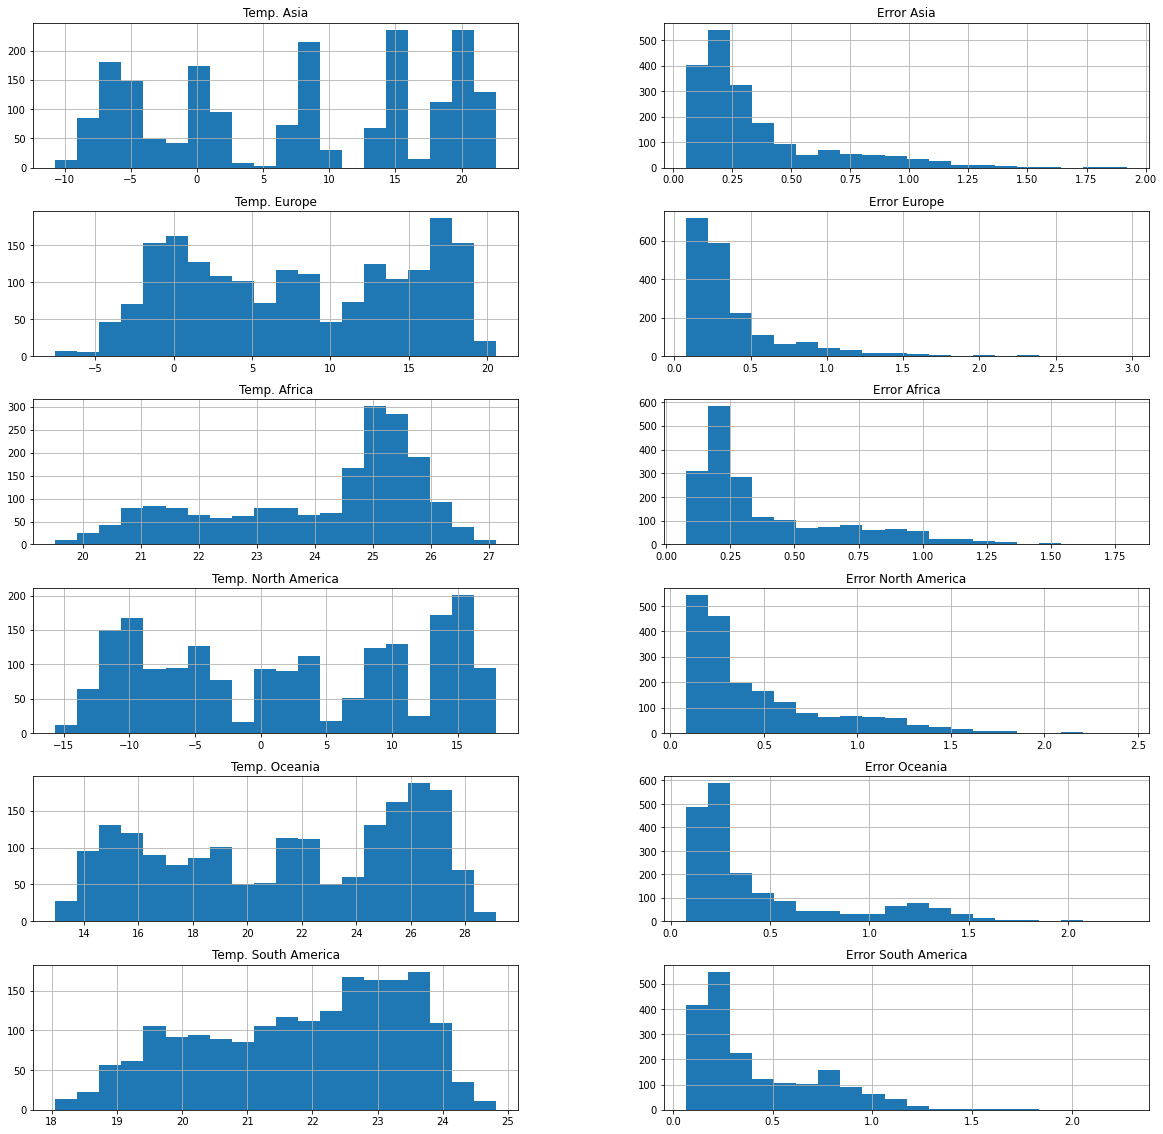

In [13]:
# Histograma de los datos
data.hist(bins=20, figsize=(20, 20), layout=(6, 2))

#### Distribución de los datos por meses

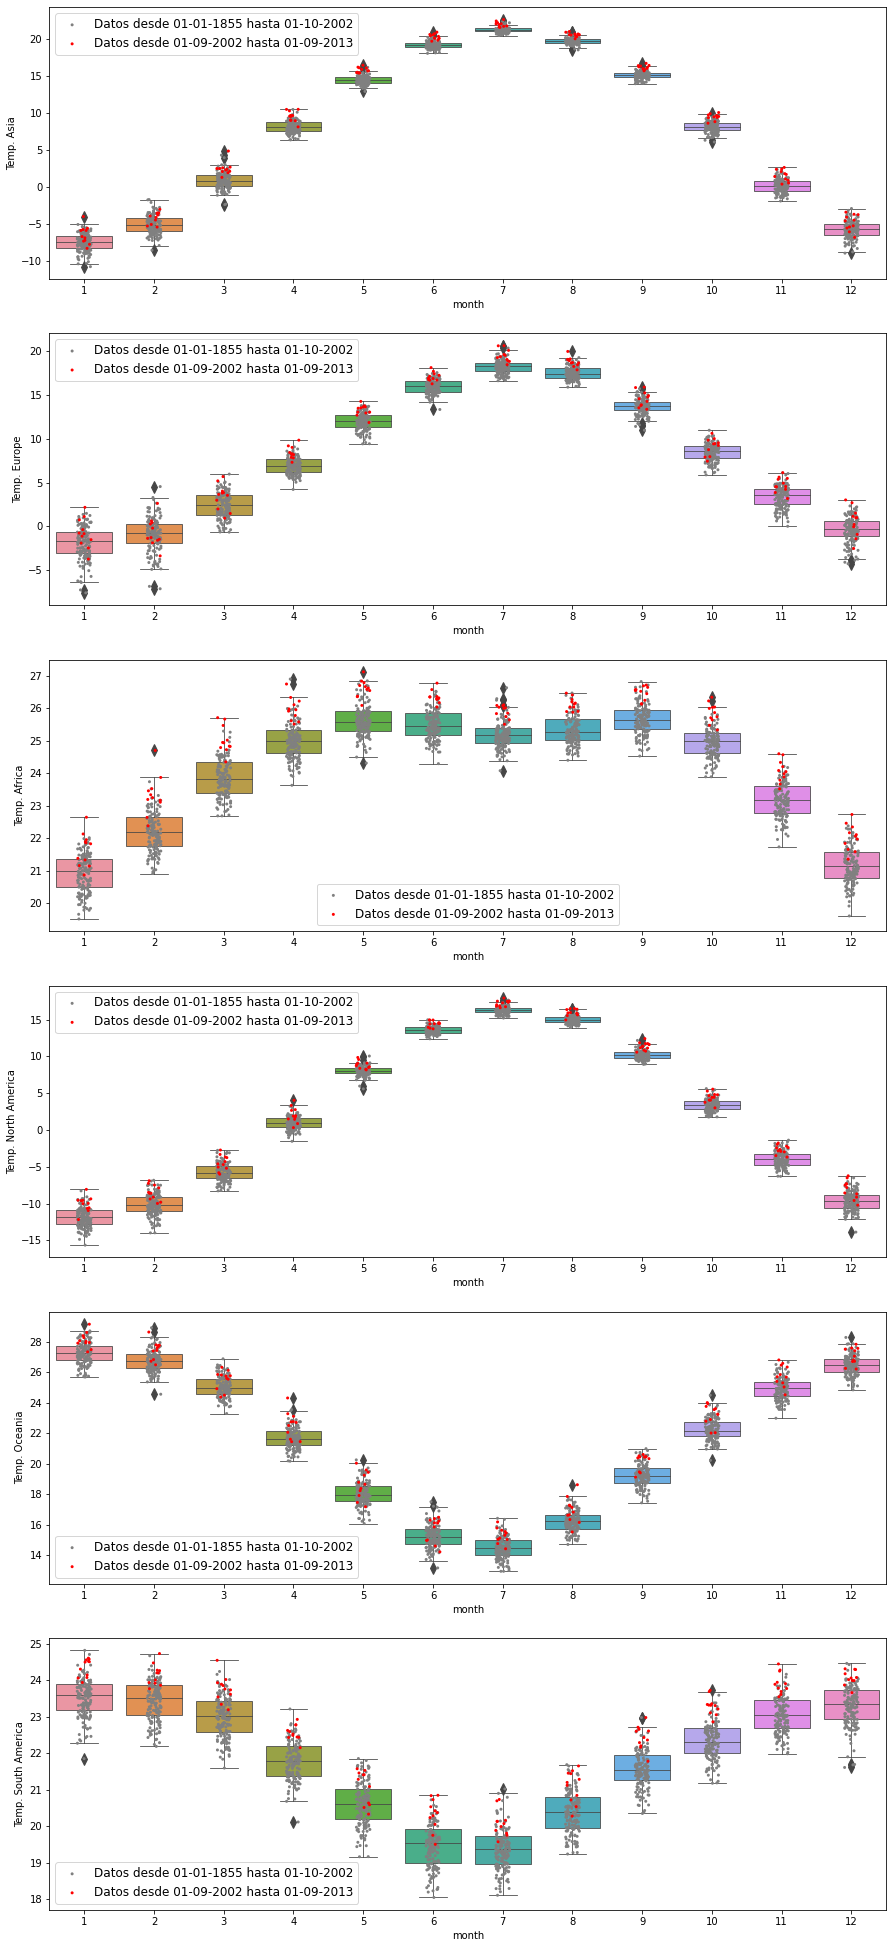

In [14]:
# Boxplot de los datos de cada continente para cada mes + scatterplot de las temperaturas medidas en cada mes
# Hemos representado las temperaturas de los últimos 11 años en otro color para ver si están fuera de la normalidad

fig, ax = plt.subplots(nrows=6, ncols=1,figsize=(15,35),sharex=False)

a=["Temp. Asia","Temp. Europe","Temp. Africa","Temp. North America","Temp. Oceania","Temp. South America"]
pos=['upper left','upper left',"lower center",'upper left',"lower left","lower left"]

for i in range(len(a)):
    sns.stripplot(x=data_month["month"][:-132], y=data_month[a[i]][:-132],color="grey",ax=ax[i]
                  ,size=3,jitter=True,label="Datos desde "+str(data_month["fecha"].iloc[0].strftime("%d-%m-%Y"))+
                  " hasta "+str(data_month["fecha"].iloc[-132].strftime("%d-%m-%Y")))
    sns.stripplot(x=data_month["month"][-133:], y=data_month[a[i]][-133:],color="red",ax=ax[i]
                  ,size=3,jitter=True,label="Datos desde "+str(data_month["fecha"].iloc[-133].strftime("%d-%m-%Y"))+
                  " hasta "+str(data_month["fecha"].iloc[-1].strftime("%d-%m-%Y")))
    sns.boxplot(x=data_month["month"], y=data_month[a[i]],ax=ax[i],fliersize=8,linewidth=0.8)
    handles, labels = ax[i].get_legend_handles_labels()
    ax[i].legend((handles[i] for i in [1,13]), (labels[i] for i in [1,13]),loc=pos[i],fontsize=12)

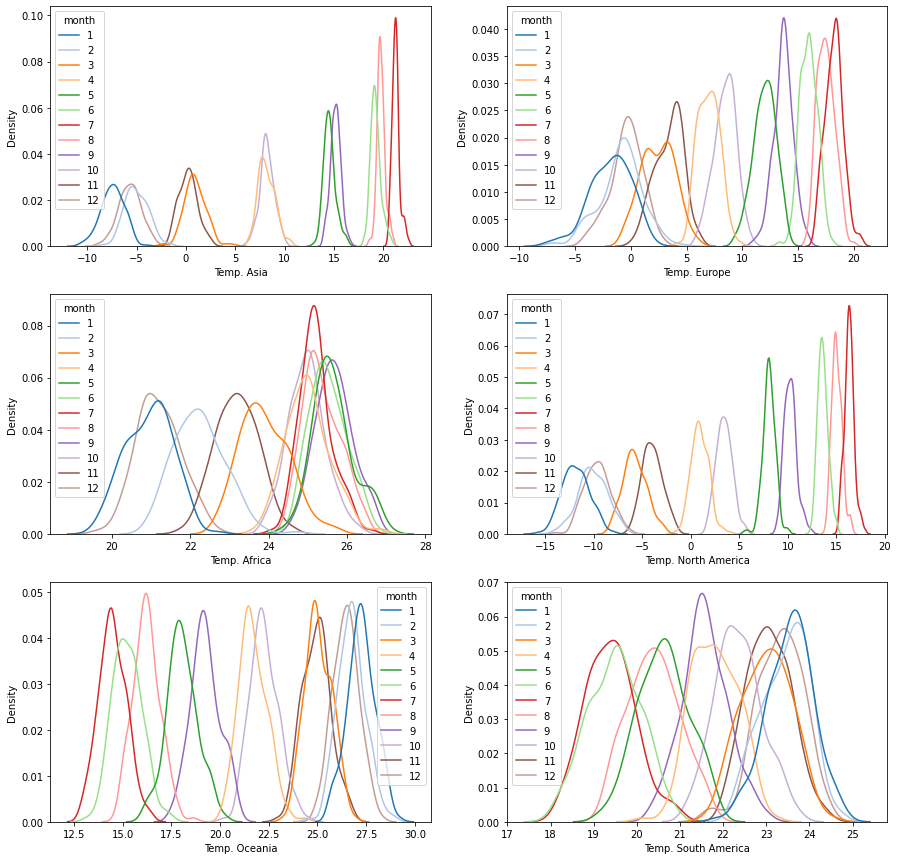

In [15]:
# Representación de la distrubución (KDE) de la temperatura medida cada mes para los diferentes contienentes 
fig = plt.figure(figsize=(15,15))
fig.subplots_adjust(hspace=0.2, wspace=0.2)

a=["Temp. Asia","Temp. Europe","Temp. Africa","Temp. North America","Temp. Oceania","Temp. South America"]

for i in range(len(a)):
    ax = fig.add_subplot(3, 2, i+1)
    sns.kdeplot(data=data_month,x=a[i],hue="month",palette='tab20',ax=ax)


#### Representación de los datos

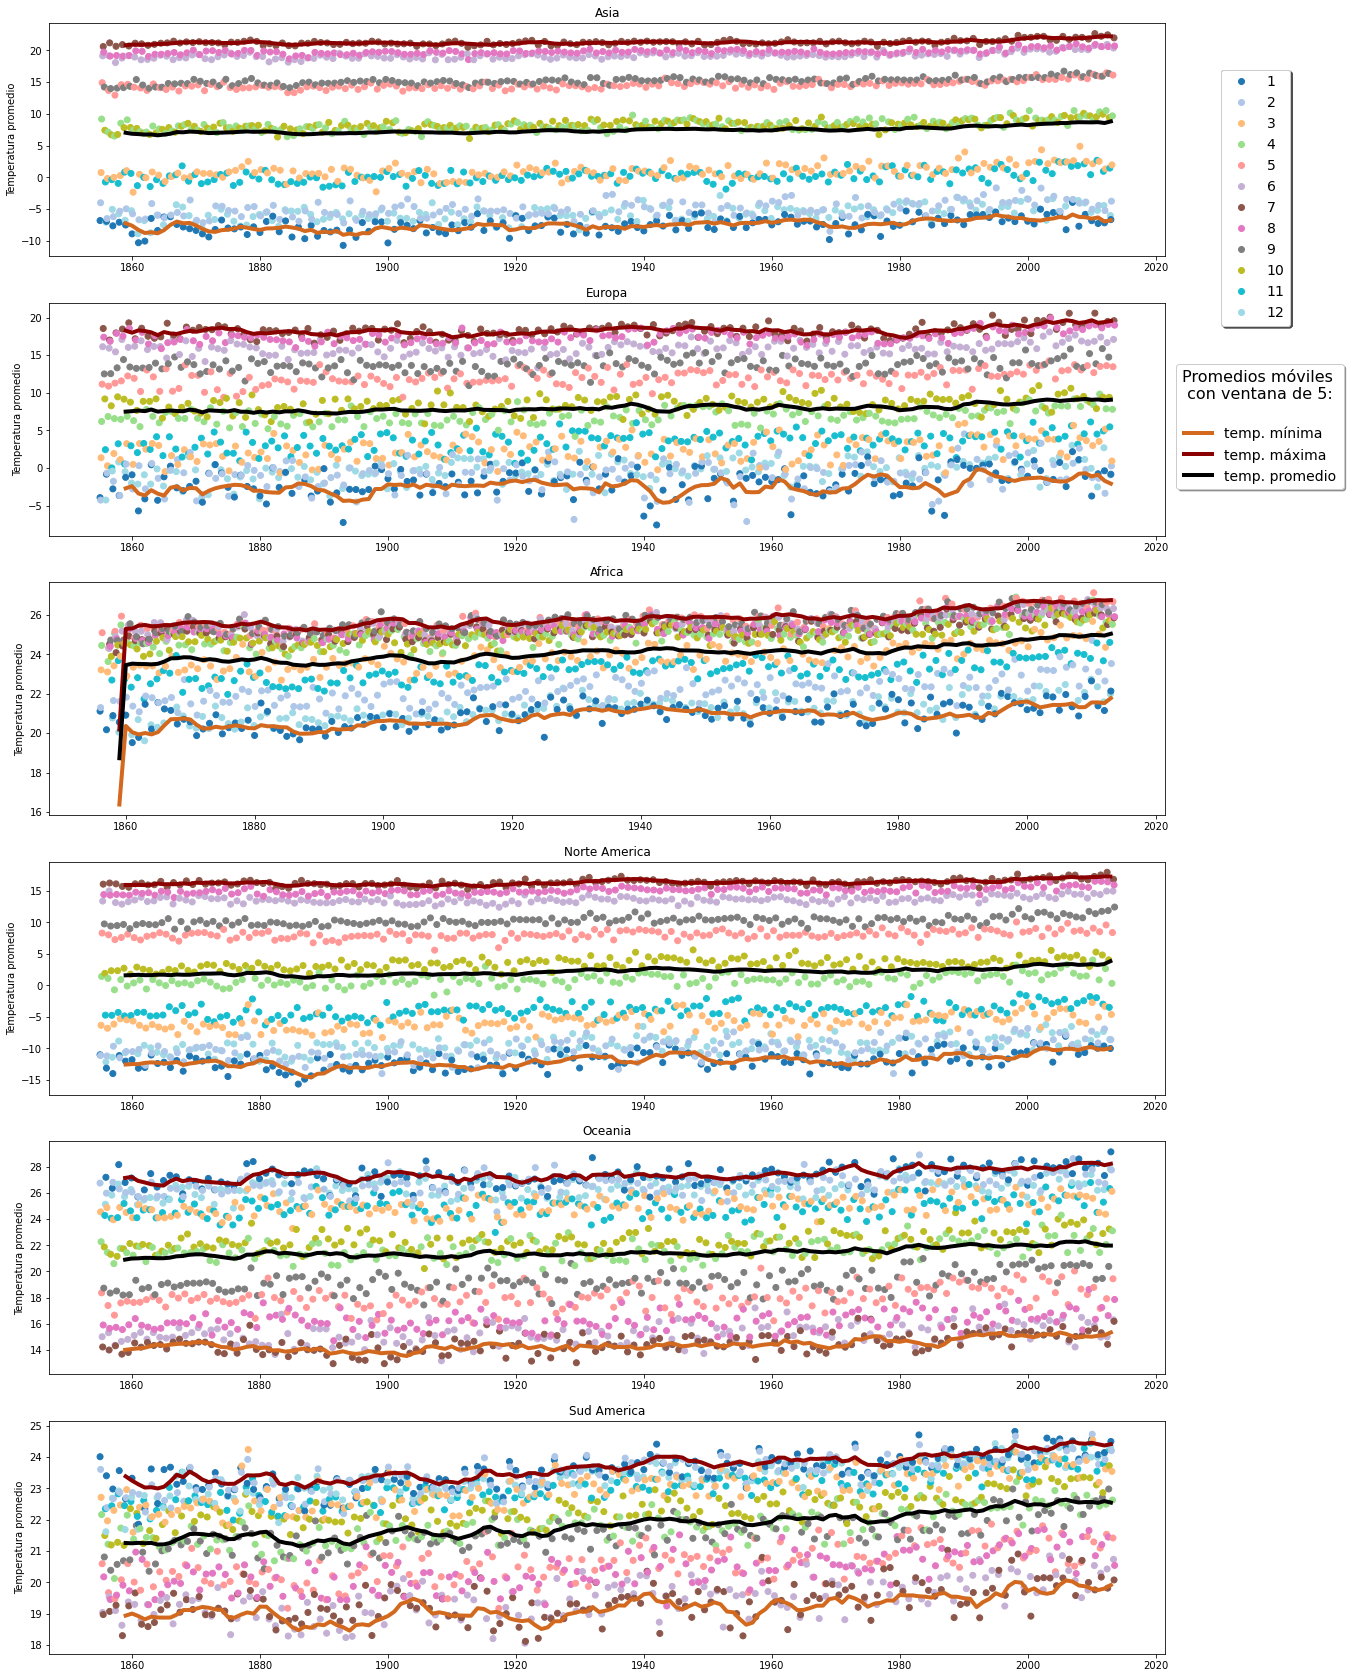

In [16]:
# Representamos todas las temperaturas medidas mensualmente junto con el promedio móvil de la temperaturas
# mínimas, máximas y promedios para cada Continente

fig, ax = plt.subplots(nrows=6, ncols=1,figsize=(20,30),sharex=False)

a=["Temp. Asia","Temp. Europe","Temp. Africa","Temp. North America","Temp. Oceania","Temp. South America"]
titulo=["Asia","Europa","Africa","Norte America","Oceania","Sud America"]
b=["Asia","Europe","Africa","North America","Oceania","South America"]

plot_lines = []

for i in range(len(a)):
    scatter = ax[i].scatter(data_month["fecha"][:],data_month[a[i]][:],c=data_month["month"][:],cmap='tab20')
    plot1 = ax[i].plot(data_sts_mov_avg.index,data_sts_mov_avg["min. "+str(b[i])],"-",label="temp. mínima",c="chocolate",lw=4)
    plot2 = ax[i].plot(data_sts_mov_avg.index,data_sts_mov_avg["max. "+str(b[i])],"-",label="temp. máxima",c="darkred",lw=4)
    plot3 = ax[i].plot(data_sts_mov_avg.index,data_sts_mov_avg["avg. "+str(b[i])],"-",label="temp. promedio",c="black",lw=4)

    ax[i].set_title(titulo[i])
    ax[i].set_ylabel('Temperatura promedio')

    
    legend1 = ax[0].legend(*scatter.legend_elements(),loc=(1.05,-0.30), fancybox=True, shadow=True,fontsize=14)
    ax[0].add_artist(legend1)
    
    handles, labels = ax[0].get_legend_handles_labels()
    ax[0].legend(handles, labels, loc=(1.01,-1),fontsize=14, fancybox=True, shadow=True)
    ax[0].get_legend().set_title("Promedios móviles \n con ventana de "+str(vent)+": \n",prop={'size':16})


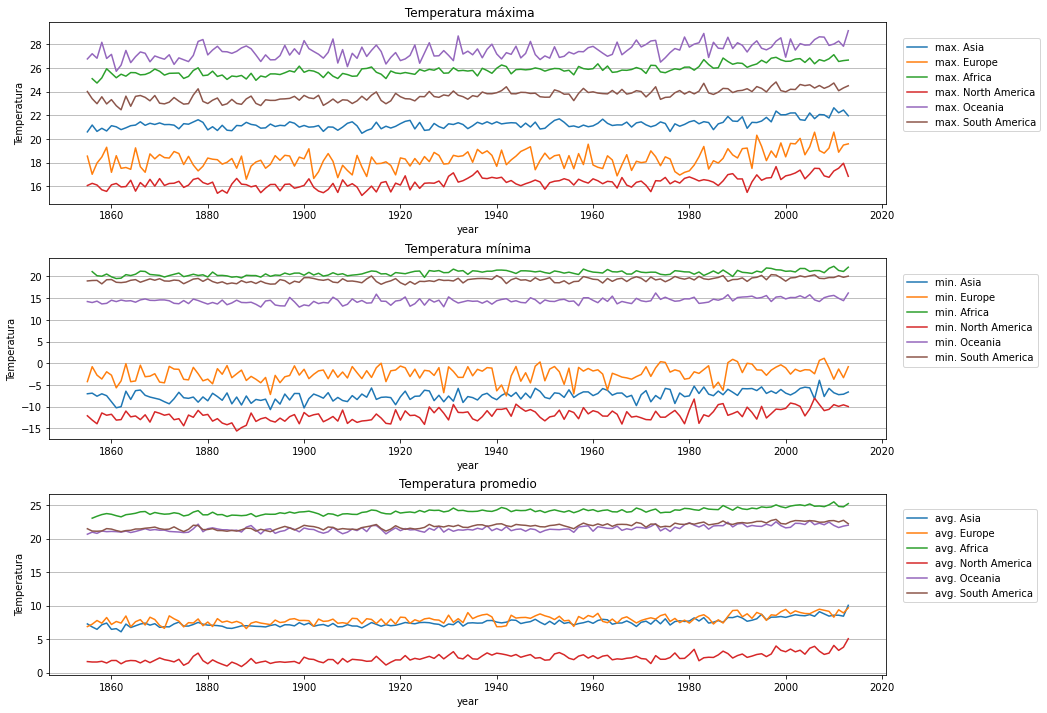

In [17]:
# Representación de la temperatura mínima, máxima y promedio por año para cada contienente

fig, ax = plt.subplots(nrows=3, ncols=1,figsize=(15,12),sharex=False)
fig.subplots_adjust(hspace=0.3, wspace=0.2)

a=["max.","min.","avg."]
b=[" Temperatura máxima", "Temperatura mínima","Temperatura promedio"]


for i in range(len(a)):
    
    data_sts[[str(a[i])+" Asia",str(a[i])+" Europe",str(a[i])+" Africa",
             str(a[i])+" North America",str(a[i])+" Oceania",str(a[i])+" South America"]].plot(ax=ax[i],title=b[i])
#     data_sts_mov_avg[[str(a[i])+" Asia",str(a[i])+" Europe",str(a[i])+" Africa",
#              str(a[i])+" North America",str(a[i])+" Oceania",str(a[i])+" South America"]].plot(ax=ax[i],title=b[i])
    ax[i].legend(loc=(1.02,0.4))
    ax[i].yaxis.grid()
    ax[i].set_ylabel('Temperatura')

#### Estudio de la estacionalidad

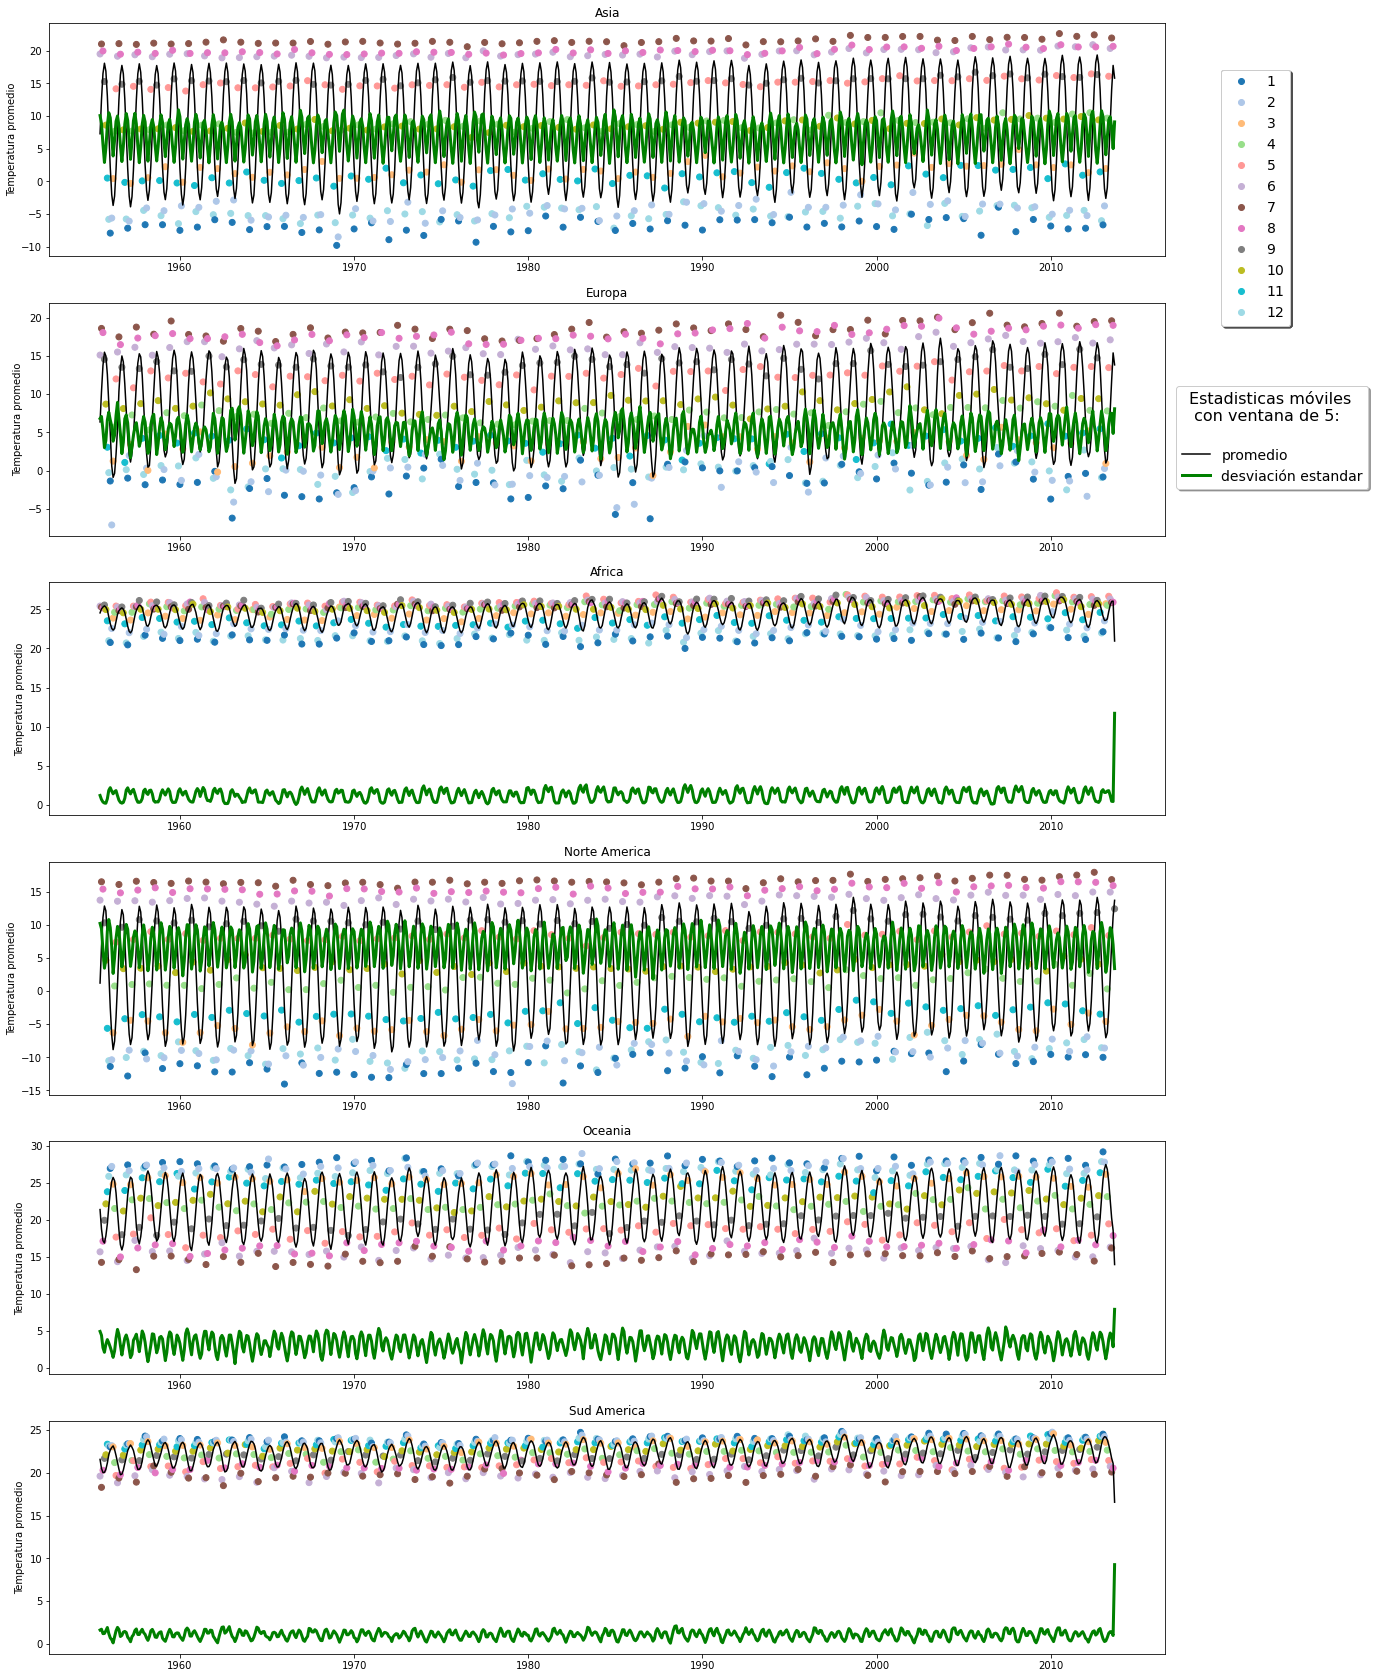

In [18]:
# Estudio de la estacionalidad con la estadistica móvil (promedio y desviación estandar)

fig, ax = plt.subplots(nrows=6, ncols=1,figsize=(20,30),sharex=False)

a=["Temp. Asia","Temp. Europe","Temp. Africa","Temp. North America","Temp. Oceania","Temp. South America"]
titulo=["Asia","Europa","Africa","Norte America","Oceania","Sud America"]
b=["Asia","Europe","Africa","North America","Oceania","South America"]

plot_lines = []

for i in range(len(a)):
    scatter=ax[i].scatter(data_month["fecha"][-700:],data_month[a[i]][-700:],c=data_month["month"][-700:]
                          ,cmap='tab20')
    plot1=ax[i].plot(data_mov_avg.index[-700:],data_mov_avg["Temp. "+str(b[i])][-700:],"-",label="promedio"
                     ,c="black",lw=1.5)
    plot1=ax[i].plot(data_mov_std.index[-700:],data_mov_std["Temp. "+str(b[i])][-700:],"-",label="desviación estandar"
                     ,c="green",lw=3)
    
    
    
    ax[i].set_title(titulo[i])
    ax[i].set_ylabel('Temperatura promedio')
    
    
    legend1 = ax[0].legend(*scatter.legend_elements(),loc=(1.05,-0.30), fancybox=True, shadow=True,fontsize=14)
    ax[0].add_artist(legend1)
    
    handles, labels = ax[0].get_legend_handles_labels()
    ax[0].legend(handles, labels, loc=(1.01,-1),fontsize=14, fancybox=True, shadow=True)
    ax[0].get_legend().set_title("Estadisticas móviles \n con ventana de "+str(vent)+": \n",prop={'size':16})


In [21]:
data

,Temp. Asia,Error Asia,Temp. Europe,Error Europe,Temp. Africa,Error Africa,Temp. North America,Error North America,Temp. Oceania,Error Oceania,Temp. South America,Error South America
fecha,,,,,,,,,,,,
1855-01-01,-6.801,1.278,-3.917,2.089,NaN,NaN,-10.997,2.443,NaN,NaN,24.012,1.459
1855-02-01,-4.001,1.279,-4.248,1.580,NaN,NaN,-11.116,1.768,26.765,1.626,23.607,1.191
1855-03-01,0.760,1.120,1.379,0.828,NaN,NaN,-6.324,1.567,24.558,1.361,22.714,0.841
1855-04-01,9.186,1.041,6.197,1.445,NaN,NaN,1.425,1.830,22.276,1.607,22.164,1.166
1855-05-01,14.901,0.882,11.154,1.151,NaN,NaN,8.306,1.571,18.359,1.350,20.594,0.933
...,...,...,...,...,...,...,...,...,...,...,...,...
2013-05-01,16.102,0.146,13.466,0.162,26.671,0.301,8.388,0.207,19.437,0.247,21.416,0.168
2013-06-01,20.364,0.213,17.096,0.239,26.324,0.188,14.954,0.237,16.294,0.277,20.734,0.225
2013-07-01,21.962,0.228,19.585,0.210,25.856,0.238,16.840,0.257,16.182,0.222,20.076,0.167


In [20]:
# Test de Dickey-Fuller

result = adfuller(data, autolag='AIC')
print('Test statistic: ' , result[0])
print('p-value: '  ,result[1])
print('Critical Values:' ,result[4])

ValueError: x is required to have ndim 1 but has ndim 2